In [3]:
import sys
sys.path.append('..')
from src.fluxonium import calculate_CQPS_rate, generate_C_x_1
import numpy as np
import scqubits as sq
import matplotlib.pyplot as plt
import scipy.constants as const
from src.utilities import C_to_Ec

# CQPS

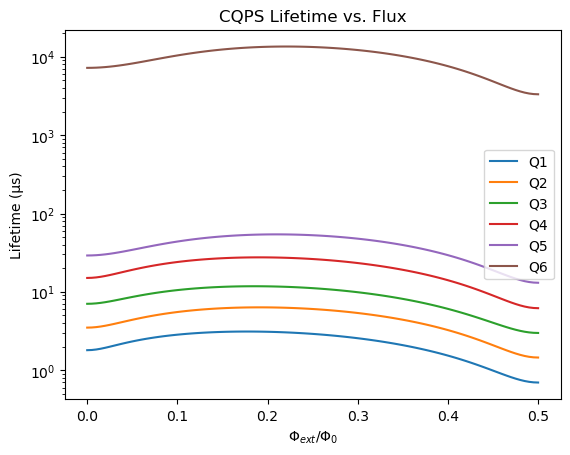

In [4]:
params = [
    {'EC': 1.41, 'EJ': 3.22, 'EL': 0.25, 'n_junctions': 85, 'l': 1.85},
    {'EC': 1.38, 'EJ': 3.165, 'EL': 0.26, 'n_junctions': 89, 'l': 1.95},
    {'EC': 1.45, 'EJ': 3.1, 'EL': 0.26, 'n_junctions': 95, 'l': 2.05},
    {'EC': 1.43, 'EJ': 3.315, 'EL': 0.27, 'n_junctions': 99, 'l': 2.15},
    {'EC': 1.37, 'EJ': 3.13, 'EL': 0.28, 'n_junctions': 103, 'l': 2.25},
    {'EC': 1.39, 'EJ': 3.2, 'EL': 0.3, 'n_junctions': 139, 'l': 3.00},
]

# Constants
cs = 49  # fF/µm^2
w = 0.200  # µm
Jc = 0.15  # µA/µm^2
phi0 = const.h / (2 * const.e * 2 * np.pi)

# Flux array
flux_array = np.linspace(0, 0.5, 101)

# Initialize the CQPS lifetime dictionary
T_CQPS = {f'Q{i+1}': np.empty_like(flux_array) for i in range(len(params))}

# Calculate the CQPS rates and lifetimes
for i, flux in enumerate(flux_array):
    for j, param in enumerate(params):
        key = f'Q{j+1}'
        fluxonium = sq.Fluxonium(EC=param['EC'], EJ=param['EJ'], EL=param['EL'], flux=flux, cutoff=50)
        ECj = C_to_Ec(cs * param['l'] * w * 1e-15) * 1e-9
        Ic = Jc * param['l'] * w
        EJj = phi0 * Ic * 1e-6 / const.h * 1e-9
        GammaCQPS = calculate_CQPS_rate(fluxonium=fluxonium, ECj=ECj, EJj=EJj, n_junctions=param['n_junctions'])
        T_CQPS[key][i] = 1 / GammaCQPS

# Plot the results
fig, ax = plt.subplots(1, 1)
for i in range(1, len(T_CQPS) + 1):
    ax.plot(flux_array, T_CQPS[f'Q{i}'] * 1e-3, label=f'Q{i}')

ax.legend()
ax.set_yscale('log')
ax.set_xlabel(r'$\Phi_{{ext}}/\Phi_0$')
ax.set_ylabel('Lifetime (µs)')
ax.set_title('CQPS Lifetime vs. Flux')
plt.show()

# Effective $E_C$

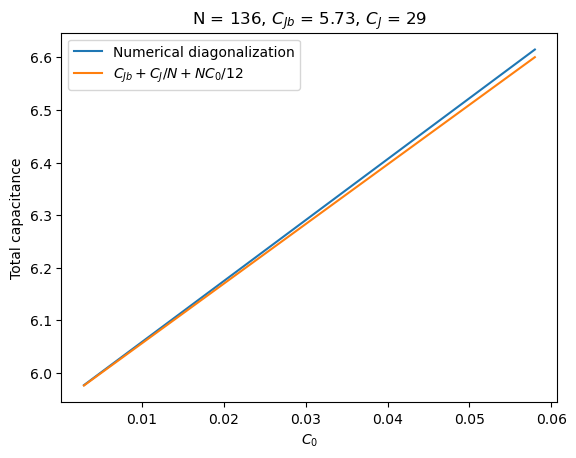

In [15]:
N = 136
CJb = 5.73
CJ = 29

C0_array = np.linspace(CJ*0.0001,CJ*0.002,100)
C_effective_array = np.zeros_like(C0_array)
for i,C0_val in enumerate(C0_array):
    C0 = C0_val * np.ones(N+1)
    Cphi_matrix = generate_C_x_1(N, CJ, C0, CJb)
    C_effective_array[i]=Cphi_matrix[0,0]
    
fig,ax = plt.subplots(1,1)
ax.plot(C0_array,C_effective_array, label="Numerical diagonalization")
ax.plot(C0_array,CJ/N + CJb  + C0_array/12*N, label=r"$C_{Jb} + C_J / N + N C_0 / 12 $ ")
ax.set_title(rf"N = {N}, $C_{{Jb}}$ = {CJb}, $C_J$ = {CJ}")
ax.set_xlabel(r'$C_0$')
ax.set_ylabel(r'Total capacitance')
ax.legend()

plt.show()